In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pwai9ndG93bi1sb2NhbC9kc2FuNTMwMC0wMS93cml0ZXVwcy8zZC1wbG90cw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/n2/m7_fj5vx6c50_yj7g23mwmq00000gn/T/ipykernel_25419/3530026178.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/importlib/_bootstrap.py": 1694574412.6564615, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/importlib/_bootstrap_external.py": 1694574412.6611667, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/zipimport.py": 1694574410.7775924, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/codecs.py": 1694574410.2208612, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/encodings/aliases.py": 1694574411.6929739, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/encodings/__init__.py": 1694574411.687787, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/encodings/utf_8.py": 1694574412.1652963, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/abc.py": 1694574410.153477, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/io.py": 1694574410.3361063, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/stat.py": 1694574410.6048596, "/Users/jpj/.pyenv/versions/3.11.5/lib/python3.11/_collections_abc.py": 1694574410.109986, "/Users/jpj/.pyenv/versions

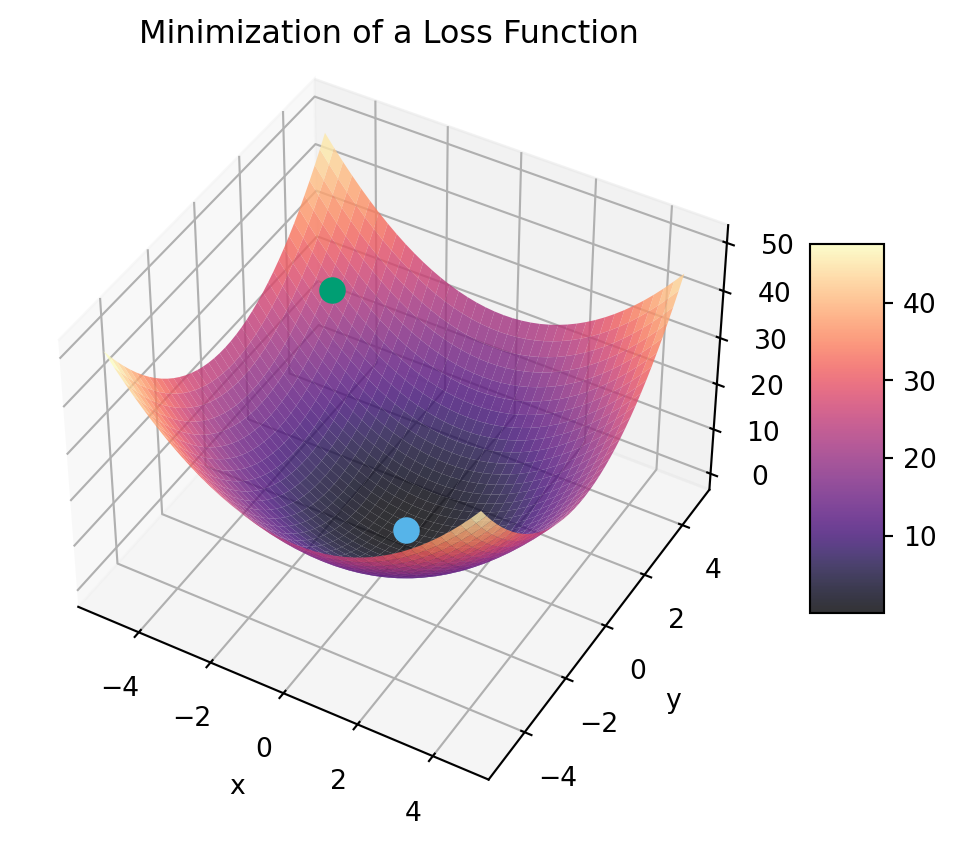

In [2]:
#| label: base-min-plot
#| echo: true
#| code-fold: show
#| fig-align: center
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(seed=5302)
from matplotlib import cm

cb_palette = ['#E69F00', '#56B4E9', '#009E73']

def loss_fn(x, y):
  return x**2 + y**2

def objective_fn(x, y):
  return -loss_fn(x, y)

rand_v = np.array([
  rng.uniform(low=-4, high=0),
  rng.uniform(low=0, high=4),
])

def gen_surface_plot(
  points,
  title=None,
  minimization=True,
  label_points=False,
  arrows=False,
  elevation=42,
  azimuth=-60
):
  if title is None:
    title = "Minimization of a Loss Function"
    if not minimization:
      title = "Maximization of an Objective Function"
  opt_fn = loss_fn if minimization else objective_fn
  fig, ax = plt.subplots(
    subplot_kw={
      "projection": "3d",
      "title": title,
      "computed_zorder": False,
    }
  )
  # Generate the surface representing the value of
  # the loss function (the z coordinate) for any
  # pair of (x,y) values
  x_range = np.arange(-5, 5, 0.25)
  y_range = np.arange(-5, 5, 0.25)
  x_vals, y_vals = np.meshgrid(x_range, y_range)
  z_vals = opt_fn(x_vals, y_vals)

  # Plot the points given by the points argument!
  points_x = [p[0] for p in points]
  points_y = [p[1] for p in points]
  points_z = [opt_fn(p[0],p[1]) for p in points]
  ax.scatter(points_x, points_y, points_z, color=cb_palette[2], s=80, zorder=10)

  # Add labels to points if label_points is True
  if label_points:
    for point_index, point in enumerate(points):
      ax.text(point[0], point[1], loss_fn(point[0], point[1]), str(point_index), zorder=20)

  # Compute and plot the optimal value
  opt_z = np.min(z_vals) if minimization else np.max(z_vals)
  ax.scatter([0], [0], [opt_z], color=cb_palette[1], s=80, zorder=10)
  surf = ax.plot_surface(
      x_vals, y_vals, z_vals, cmap='magma', zorder=0, alpha=0.8
  )
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  
  ax.view_init(elev=elevation, azim=azimuth)

  # Add arrows if requested
  if arrows:
    for i in range(len(points) - 1):
      cur_point = points[i]
      cur_z = loss_fn(cur_point[0], cur_point[1])
      next_point = points[i+1]
      next_z = loss_fn(next_point[0], next_point[1])
      x_diff = next_point[0] - cur_point[0]
      y_diff = next_point[1] - cur_point[1]
      z_diff = next_z - cur_z
      ax.quiver(
        cur_point[0], cur_point[1], cur_z,
        x_diff, y_diff, z_diff,
        color = 'white', alpha = .8, lw = 1,
        length=1
      )

  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.5, aspect=5)
  plt.show()
gen_surface_plot(points=[rand_v])

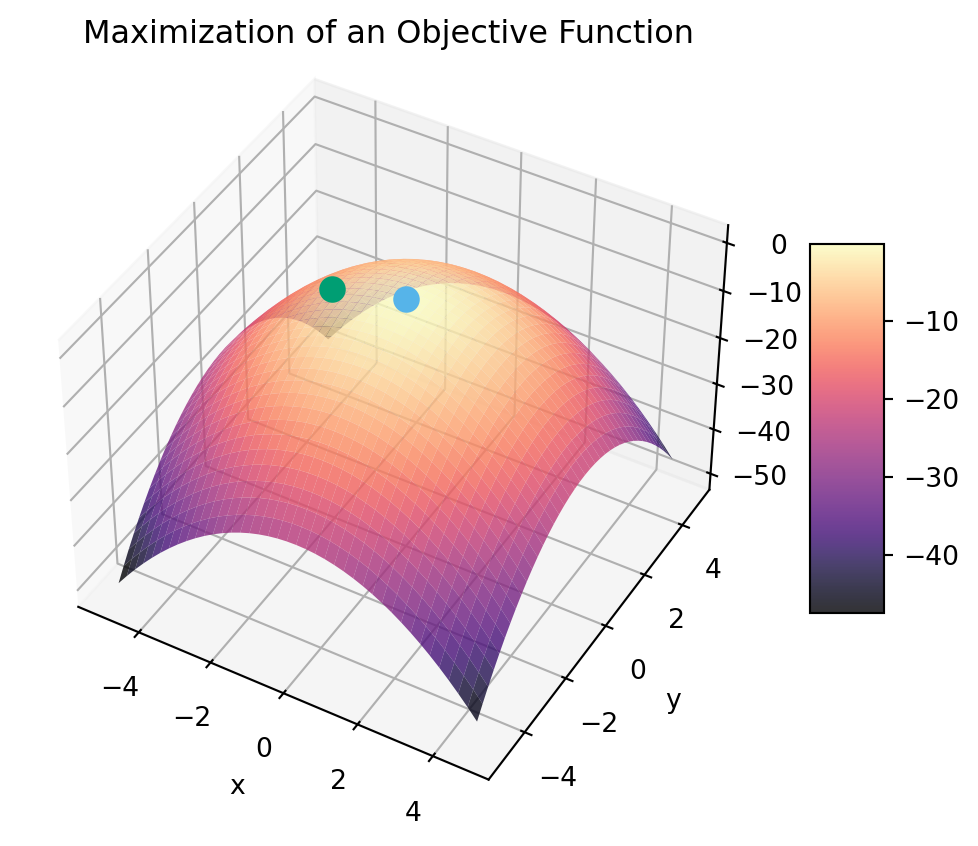

In [3]:
#| label: basic-max-plot
#| echo: true
#| code-fold: false
#| fig-align: center
gen_surface_plot(points=[rand_v], minimization=False)

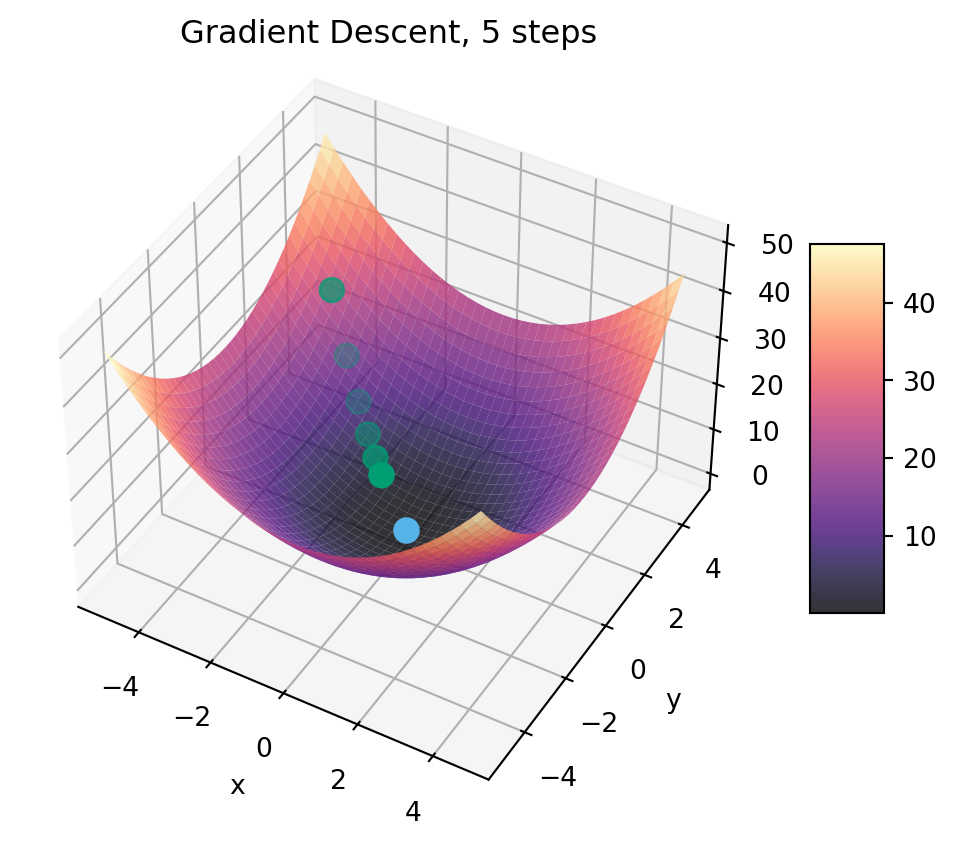

In [4]:
#| label: grad-5-steps
#| fig-align: center
#| echo: true
#| code-fold: show
def grad_loss(x, y):
  return np.array([2*x, 2*y])

def run_grad_descent(starting_v, num_steps, step_size=0.1):
  cur_v = starting_v
  path = [starting_v]
  for i in range(num_steps):
    grad_at_v = grad_loss(cur_v[0], cur_v[1])
    new_v = cur_v - step_size * grad_at_v
    path.append(new_v)
    cur_v = new_v
  return path
num_steps = 5
grad_path = run_grad_descent(rand_v, num_steps)
gen_surface_plot(grad_path, title=f"Gradient Descent, {num_steps} steps")

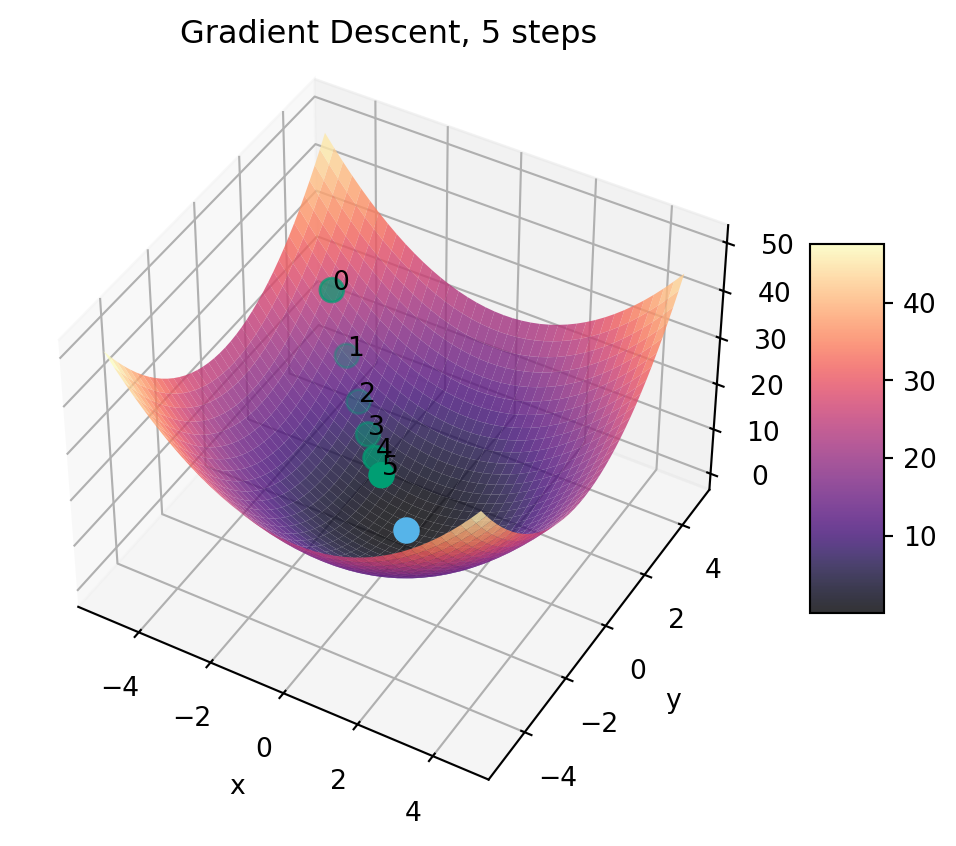

In [5]:
#| label: grad-5-steps-labels
#| echo: true
#| code-fold: show
#| fig-align: center
gen_surface_plot(grad_path, title=f"Gradient Descent, {num_steps} steps", label_points=True)

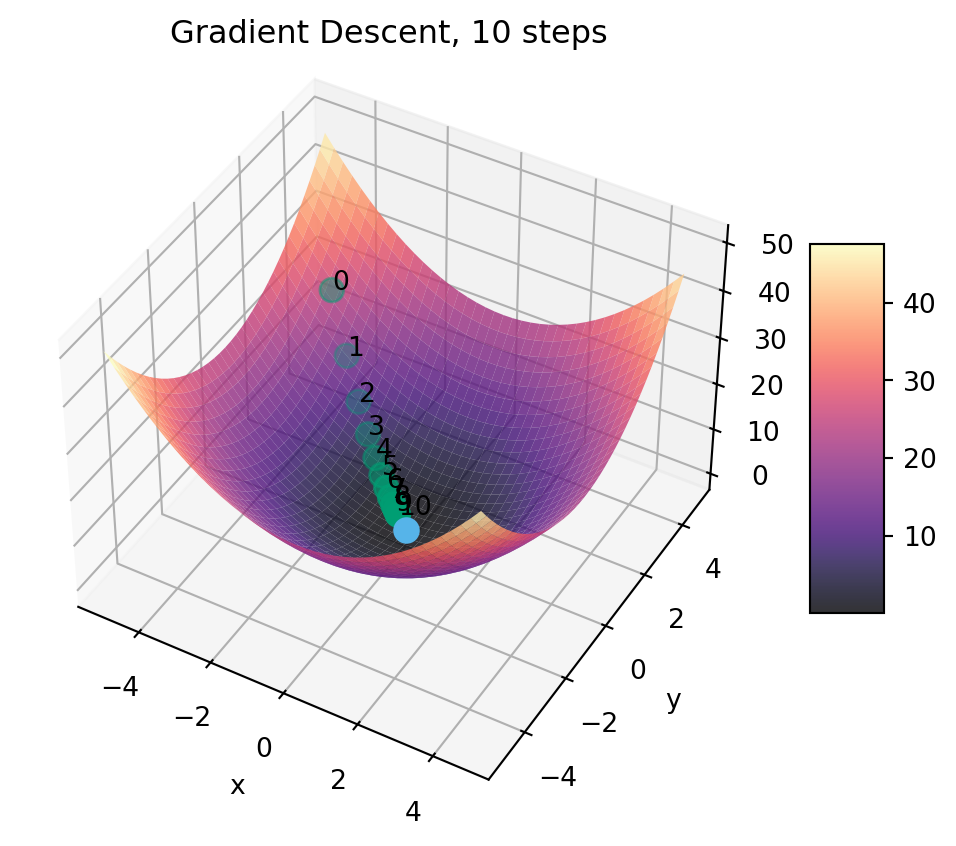

In [6]:
#| label: grad-10-steps
#| echo: true
#| code-fold: show
#| fig-align: center
num_steps = 10
grad_path_10 = run_grad_descent(rand_v, num_steps)
gen_surface_plot(grad_path_10, title=f"Gradient Descent, {num_steps} steps", label_points=True)

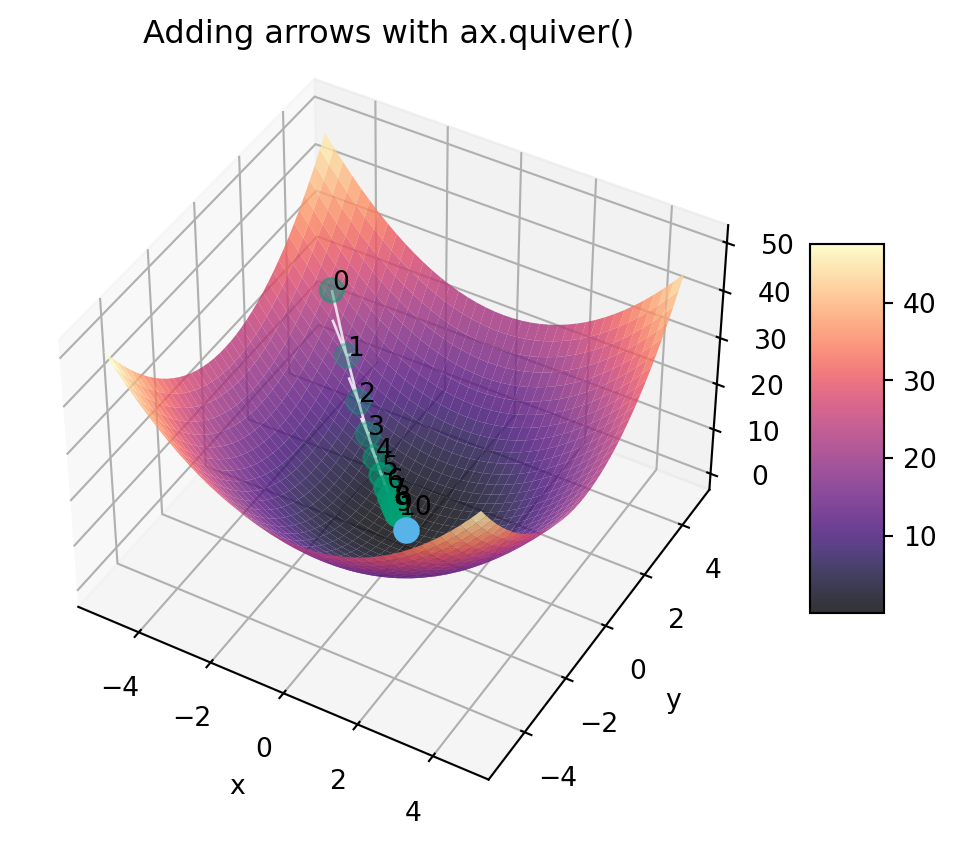

In [7]:
#| label: grad-with-arrows
#| echo: true
#| code-fold: show
#| fig-align: center
gen_surface_plot(
  grad_path_10,
  title="Adding arrows with ax.quiver()",
  label_points=True,
  arrows=True
)

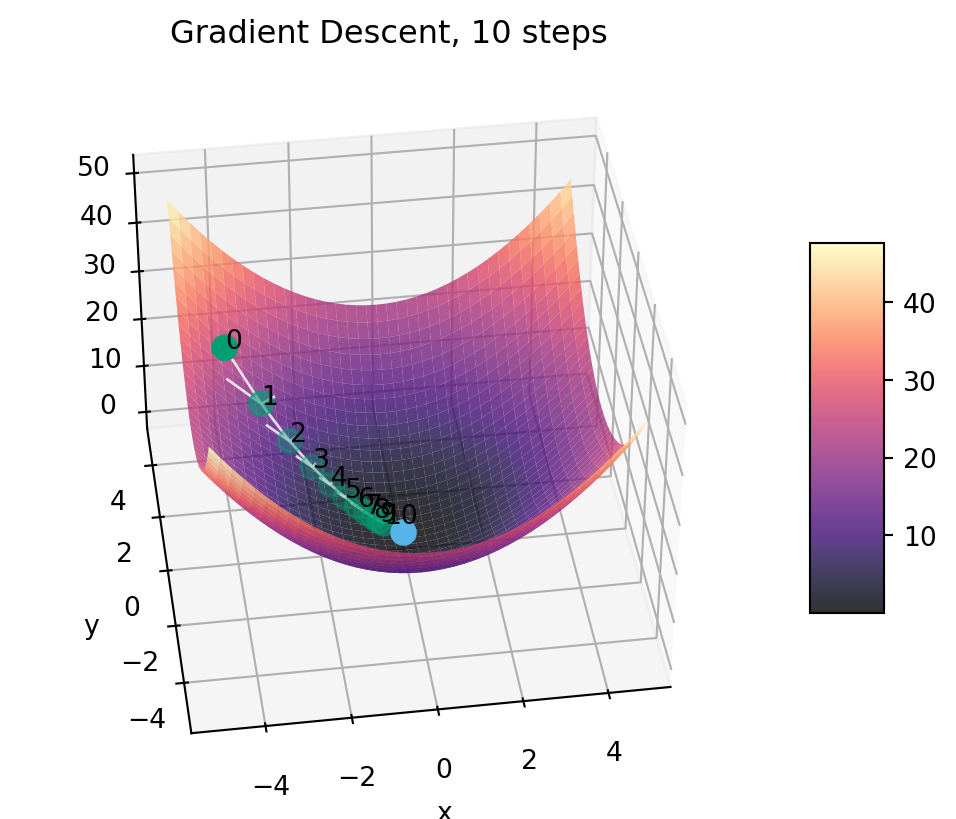

In [8]:
#| label: trajectory-rotate
#| echo: true
#| code-fold: show
#| fig-align: center
gen_surface_plot(
  grad_path_10,
  title=f"Gradient Descent, {num_steps} steps",
  label_points=True,
  arrows=True,
  elevation=39,
  azimuth=-98
)